# Lab 01: Data pre-processing 

- Student ID: 21127740
- Student name: Đoàn Nam Thắng

## Instructions

### How to do your homework

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```YOUR ANSWER HERE``` in text cells.

**NOTE:**

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule. 
- Because our plagiarism checker is very sensitive, if the plagiarism check result is <font color='red'>greater than 60%</font>, your work will receive <font color='red'>0 point</font>. Therefore we will not deal with plagiarism cases.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID1.ipynb` (e.g. `19123.ipynb`) and submit on Moodle.

<font color=yellow>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points (0-50%)!!!</font>


### Contents

- Data pre-processing techniques.
    - Exploring your data (2 pts)
    - Encoding categorical (2 pts)
    - Discretization techniques (2 pts)
    - Outlier handling techniques (1 pts)
    - Feature scaling techniques (2 pts)
    - Clean submission (1 pts)

## Import libs
**Note:** <span style="color:yellow">All packages you can use in this lab are imported in the cell below. Please don't modify this, just run that.</span>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import json
from zlib import adler32

from typing import List, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer

In [3]:
# Config matplotlib and pandas display
%matplotlib inline
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [4]:
# Config seaborn
plt.rcParams["figure.figsize"] = [12, 8]

custom = {"axes.edgecolor": "blue", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("whitegrid", rc = custom)

In [5]:
# Checking Python virtual env
sys.executable

'c:\\Users\\Admin\\anaconda3\\envs\\dm-env\\python.exe'

## Exploring your data (2 pts)

### Read rawdata from file

In [6]:
# YOUR CODE HERE
raw_df = pd.read_csv('./data/spaceX_laucnh.csv')
# raise NotImplementedError()

In [7]:
# TEST
raw_df.head()

,uct_time,launch_name,payloads,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,2006-03-24T22:30:00.000Z,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
1,2007-03-21T01:10:00.000Z,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
2,2008-08-03T03:34:00.000Z,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
3,2008-09-28T23:15:00.000Z,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success
4,2009-07-13T03:35:00.000Z,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success


### How many rows and how many columns does the raw data have?

Next, you calculate the number of rows and columns of the DataFrame `raw_df` and store it in the variable `shape` (tuple).

In [8]:
# YOUR CODE HERE
shape = raw_df.shape
shape
# raise NotImplementedError()

(205, 17)

In [9]:
# TEST
assert adler32(str(np.sqrt(shape[0] * shape[1])).encode()) == 590480314

What does each line mean? Does it matter if the lines have different meanings?### 

**TODO**: 

YOUR ANSWER HERE

    What does each line mean?

Each line in the table represents a separate launch event conducted by SpaceX. The table includes various details about each launch, such as the launch date and time (in UTC format), the name of the space mission, information about the payloads on the launch (including type, mass, and orbit), details about the rocket used for the launch (name, number of boosters, height, diameter, and mass), the name and region of the launchpad, geographic coordinates of the launchpad, information about the landing pad (name, type, region, and geographic coordinates), and the outcome of the launch (success or failure).

    Does it matter if the lines have different meanings?

Yes, it does matter if the lines have different meanings, especially when analyzing or interpreting the data. If the lines have different meanings, it implies that there is variability or diversity among the launch events. This variability could include differences in launch outcomes, payload types, rocket specifications, and other factors. Understanding these differences is essential for drawing accurate conclusions, making informed decisions, and gaining insights from the data. Therefore, it is important to consider and account for the variations in meanings among the lines when working with the dataset.

### Does the raw data have duplicate rows?

Next, you calculate the number of rows with duplicate indexes and store it in the variable `num_duplicated_rows`. In a group of lines with the same index, the first line is not counted as repeated.

In [10]:
# raise NotImplementedError()
num_duplicated_rows = raw_df.duplicated().sum()
num_duplicated_rows

0

In [11]:
# TEST
assert adler32(str(num_duplicated_rows).encode()) == 3211313

### What does each column mean?

To see the meaning of each column:
- First, you need to read the file "metadata.json" in the `data` folder into DataFrame `metadata`;
- Then, you describe what suitable datatype for each column? 

In [12]:
# YOUR CODE HERE
# raise NotImplementedError()

metadata = pd.read_json('./data/metadata.json')
print(raw_df.dtypes)

uct_time             object
launch_name          object
payloads             object
rocket_name          object
rocket_boosters       int64
rocket_height       float64
rocket_diameter     float64
rocket_mass         float64
launchpad_name       object
launchpad_region     object
launchpad_geo        object
landpad             float64
landpad_name         object
landpad_type         object
landpad_region       object
landpad_geo          object
outcome              object
dtype: object


In [13]:
# TEST
metadata

,title,description,source,certificate_link,certificate,attributions
landpad,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The landpad information.
landpad_geo,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The geo location of the landing pad.
landpad_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The name of the landing pad.
landpad_region,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The region of the landing pad.
landpad_type,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The type of the landing pad.
launch_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,Launch name. Typically the name of the space mission.
launchpad_geo,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The geo location of the launchpad.
launchpad_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The name of the launchpad.
launchpad_region,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The region of the launchpad.
outcome,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,Boolean indicating launch success or failure.


**TODO: Describe datatype**

YOUR ANSWER HERE

There are suitable data types for each column:

1. `uct_time`: Ideally, this should be in datetime format to represent the launch date and time accurately.

2. `launch_name`: This column represents the name of the space mission and can remain as an object (string) data type.

3. `payloads`: This column contains information about the payloads on the launch, which could be a list of dictionaries. It may be more suitable to further parse this column into separate columns based on payload attributes, or it can be kept as an object data type.

4. `rocket_name`: The name of the rocket, which can remain as an object data type.

5. `rocket_boosters`: This column represents the number of boosters on the rocket and can remain as an integer data type.

6. `rocket_height, rocket_diameter, rocket_mass`: These columns represent numerical values for rocket specifications and can remain as float64 data types.

7. `launchpad_name, launchpad_region, launchpad_geo`: These columns represent information about the launchpad and can remain as object data types.

8. `landpad, landpad_name, landpad_type, landpad_region, landpad_geo`: These columns represent information about the landing pad and can remain as object data types.

9. `outcome`: This column represents the outcome of the launch (success or failure) and can remain as an object data type, or it can be converted to a boolean data type for more efficient storage and processing.

Before moving forward, you should read the results displayed above and make sure you understand the meaning of the columns. To understand the meaning of the column, you may need to look at the values of the DataFrame side column `raw_df`.

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing?

Next, you calculate the data type (dtype) of each column in DataFrame `raw_df` and save the result into Series `dtypes` (This Series has the index as the column name).

In [14]:
# YOUR CODE HERE
dtypes = raw_df.dtypes
# raise NotImplementedError()

In [15]:
# TEST
dtypes = raw_df.dtypes

int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
assert adler32(str(len(int_cols)).encode()) == 3276850

float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert adler32(str(len(float_cols)).encode()) == 3473461

object_cols = set(dtypes[dtypes == object].index)
assert adler32(str(len(object_cols)).encode()) == 9830500

#### Convert datatype for UCT times attribute

The datatype of the column `uct_time` should be datetime. You have to convert it to the right datatype. 

In [16]:
# YOUR CODE HERE
raw_df["uct_time"] = pd.to_datetime(raw_df["uct_time"])
# raise NotImplementedError()

In [17]:
# TEST
raw_df["uct_time"].dtype

datetime64[ns, UTC]

For the remain columns, we will process later. :)

### Exploring datetime attributes

In [18]:
datetime_col_df = raw_df.select_dtypes(include=['datetime64','datetime64[ns, UTC]'])
datetime_col_df.head()

,uct_time
0,2006-03-24 22:30:00+00:00
1,2007-03-21 01:10:00+00:00
2,2008-08-03 03:34:00+00:00
3,2008-09-28 23:15:00+00:00
4,2009-07-13 03:35:00+00:00


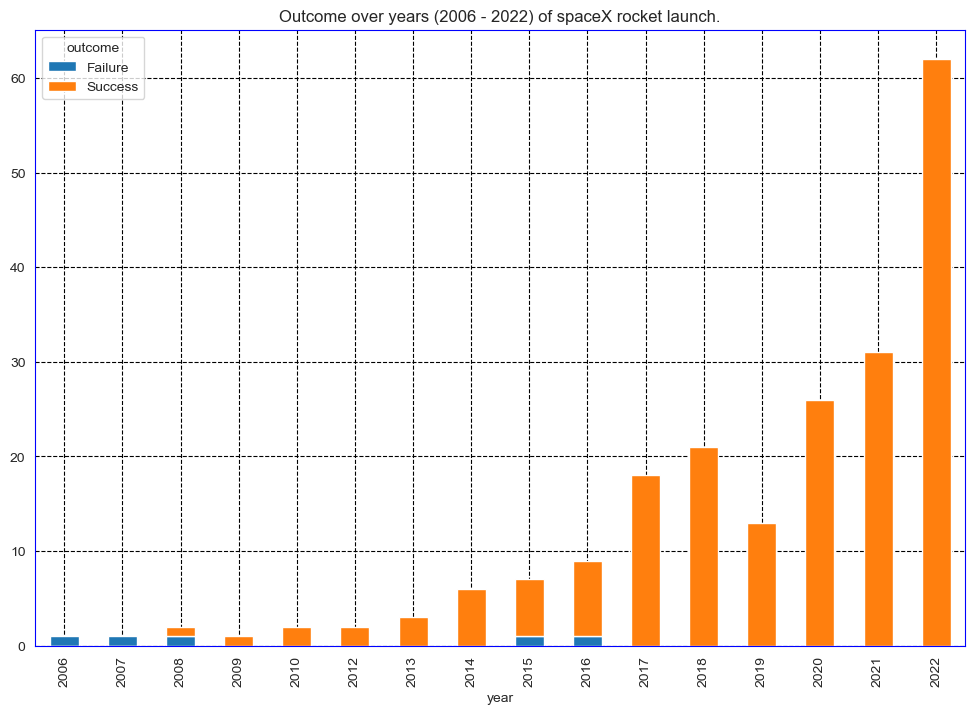

In [19]:
# Visualization
df_plot = raw_df.copy()
df_plot["year"] = raw_df['uct_time'].dt.year
df_plot = df_plot.groupby(['outcome', 'year']).size().reset_index().pivot(columns='outcome', index='year', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title("Outcome over years (2006 - 2022) of spaceX rocket launch.")
plt.show()

**TODO: Describe your observation from chart**

YOUR ANSWER HERE

- The bar chart illustrates the outcome of SpaceX rocket launches from 2006 to 2022. Over the observed years, there has been a consistent increase in the number of launch events, with a notable rise in frequency. Concurrently, the probability of success demonstrates a stable upward trend, underscoring SpaceX's improved operational efficiency and reliability. 

- Noteworthy are the sporadic instances of failure, with three failures recorded from 2006 to 2008, one in 2015, and another in 2016, out of a total of 205 observed launches. Despite these setbacks, SpaceX exhibits an impressive success rate overall, highlighting the inherent challenges of space exploration.

### Exploring numerical attributes

In [20]:
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
0,0,22.25,1.68,30146.0,NaN
1,0,22.25,1.68,30146.0,NaN
2,0,22.25,1.68,NaN,NaN
3,0,22.25,1.68,NaN,NaN
4,0,22.25,1.68,30146.0,NaN


For columns with numeric data types, you will calculate:
- Percentage (from 0 to 100) of missing values
- Min value
- Lower quantile
- Median value
- Upper quantile
- Max value

You will save the results to a DataFrame `num_col_info_df`, where:
- The names of the columns are the names of the numeric columns in `raw_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [21]:
def missing_ratio(s):
    # TODO:
    # YOUR CODE HERE
    return round(s.isna().sum() / len(s), 1)
    # raise NotImplementedError()

def median(df):
    # TODO:
    # YOUR CODE HERE
    return round(df.median(), 1)
    # raise NotImplementedError()

def lower_quartile(df):
    # TODO:
    # YOUR CODE HERE
    return round(df.quantile(0.25), 1)
    # raise NotImplementedError()

def upper_quartile(df):
    # TODO:
    # YOUR CODE HERE
    return round(df.quantile(0.75), 1)
    # raise NotImplementedError()

In [22]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
missing_ratio,0.0,0.30,0.30,0.3,1.0
min,0.0,22.25,1.68,30146.0,NaN
lower_quartile,0.0,70.00,3.70,549054.0,NaN
median,0.0,70.00,3.70,549054.0,NaN
upper_quartile,0.0,70.00,3.70,549054.0,NaN
max,2.0,70.00,12.20,1420788.0,NaN


If an attribute has missing ratio greater than 70%, you can consider to drop it from dataframe.

In [23]:
# YOUR CODE HERE

columns_to_drop = num_col_info_df.columns[num_col_info_df.loc['missing_ratio'] > 0.7]
num_col_df = num_col_df.drop(columns=columns_to_drop)
raw_df = raw_df.drop(columns=columns_to_drop)
# raise NotImplementedError()

In [24]:
# TEST
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
0,0,22.25,1.68,30146.0
1,0,22.25,1.68,30146.0
2,0,22.25,1.68,NaN
3,0,22.25,1.68,NaN
4,0,22.25,1.68,30146.0


In the otherwise case, you have to fill missing values. To deal with missing values, you have to perform mean fill, median fill, and mode fill. Then, you study how different they are by using the visualization of probability density function (p.d.f).

In [25]:
# YOUR CODE HERE
## Mean fill
num_col_df["mean_fill_rocket_height"] = num_col_df["rocket_height"].fillna(num_col_df["rocket_height"].mean())
# num_col_df = num_col_df.fillna(num_col_df.mean())
# raise NotImplementedError()

In [26]:
# YOUR CODE HERE
## Median fill
num_col_df["median_fill_rocket_height"] = num_col_df["rocket_height"].fillna(num_col_df["rocket_height"].median())
# num_col_df = num_col_df.fillna(num_col_df.median())
# raise NotImplementedError()

In [27]:
# YOUR CODE HERE
## Mode fill
num_col_df["mode_fill_rocket_height"] = num_col_df["rocket_height"].fillna(num_col_df["rocket_height"].mode().iloc[0])
# num_col_df = num_col_df.fillna(num_col_df.mode())
# raise NotImplementedError()

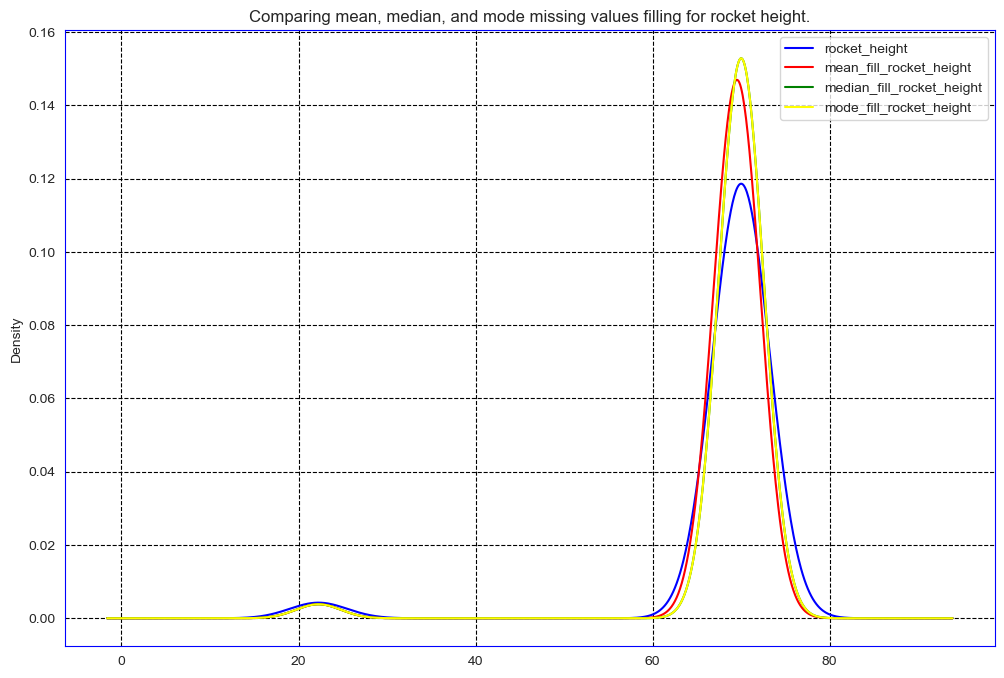

In [28]:
# Visualization for rocket_height
fig = plt.figure()
ax = fig.add_subplot(111)

num_col_df["rocket_height"] .plot(kind="kde", ax=ax, color="blue")
num_col_df["mean_fill_rocket_height"] .plot(kind="kde", ax=ax, color="red")
num_col_df["median_fill_rocket_height"] .plot(kind="kde", ax=ax, color="green")
num_col_df["mode_fill_rocket_height"] .plot(kind="kde", ax=ax, color="yellow")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title("Comparing mean, median, and mode missing values filling for rocket height.")
plt.show()

**TODO: Describe your observation from chart**

YOUR ANSWER HERE

- From the chart, we observe distinct patterns among the KDE plots representing different strategies for handling missing values in the "rocket_height" column. The red line, denoting mean-filled values, exhibits a peak higher than the original "rocket_height" line around x = 70, yet aligns closely elsewhere. In contrast, the green (median-filled) and yellow (mode-filled) lines consistently coincide, showing peaks slightly higher than the mean-filled line around x = 70. 

- Notably, the mode and median lines surpass the mean line, indicative of their higher frequencies in the dataset.
This discrepancy arises because the mean replaces missing values by averaging both existing values, yielding 68.34 (calculated as (70 * 139 + 5 * 22.25) / 144) for non-missing rows, which is lower than the mode and median fill values of 70. This insight underscores the impact of different missing value filling strategies on the distribution of the "rocket_height" variable.

**Before choosing one of them to fill in your `raw_df`**, do you realize an abnomal in `rocket_height` attribute?

**TODO:** Read metadata again, check `rocket_name`, find the way to fill missing value for `rocket_height`.

In [29]:
# YOUR CODE HERE
## Recheck: find unique elements in `rocket_name`
raw_df["rocket_name"].unique()

## Check the maximum and minimum height values for each rocket
def checking_range(rocket_name: str) -> tuple[float, float]:
    """Checking range of height for a given rocket name

    Args:
        rocket_name (str): the name of rocket

    Returns:
        tuple[float, float]: the range, min-max.
    """
    
    rocket_data = raw_df[raw_df["rocket_name"] == rocket_name]
    return rocket_data["rocket_height"].min(), rocket_data["rocket_height"].max()
    # raise NotImplementedError()

In [30]:
# Perform checking for Falcon 1
assert adler32(str(checking_range(rocket_name="Falcon 1")[0] + checking_range(rocket_name="Falcon 1")[1]).encode()) == 33620172

In [31]:
# Perform checking for Falcon 9
assert adler32(str(checking_range(rocket_name="Falcon 9")[0] + checking_range(rocket_name="Falcon 9")[1]).encode()) == 48627956

In [32]:
# Perform checking for Falcon Heavy
assert adler32(str(checking_range(rocket_name="Falcon Heavy")[0] * checking_range(rocket_name="Falcon Heavy")[1]).encode()) == 70713644

And now, you should fill missing values with a specific value. 

In [33]:
# TODO:
# YOUR CODE HERE
def fill_rocketheight(df: pd.DataFrame) -> pd.DataFrame:
    cp_df = df.copy()
    
    cp_df.loc[(cp_df["rocket_name"] == "Falcon 1") & (cp_df["rocket_height"].isnull()), "rocket_height"] = checking_range(rocket_name="Falcon 1")[0]

    cp_df.loc[(cp_df["rocket_name"] == "Falcon 9") & (cp_df["rocket_height"].isnull()), "rocket_height"] = checking_range(rocket_name="Falcon 9")[0]

    cp_df.loc[(cp_df["rocket_name"] == "Falcon Heavy") & (cp_df["rocket_height"].isnull()), "rocket_height"] = checking_range(rocket_name="Falcon Heavy")[0]

    return cp_df

raw_df = fill_rocketheight(raw_df)


Choose one of ways (mean fill, median fill) to fill missing values for the remain columns (`rocket_diameter`, and `rocket_mass`)

In [34]:
# YOUR CODE HERE
rocket_diameter_mean = raw_df["rocket_diameter"].mean()

raw_df["rocket_diameter"].fillna(rocket_diameter_mean, inplace=True)

rocket_mass_mean = raw_df["rocket_mass"].mean()

raw_df["rocket_mass"].fillna(rocket_mass_mean, inplace=True)

# raise NotImplementedError()

In [35]:
# TEST
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
missing_ratio,0.0,0.00,0.00,0.0
min,0.0,22.25,1.68,30146.0
lower_quartile,0.0,70.00,3.70,549054.0
median,0.0,70.00,3.70,549054.0
upper_quartile,0.0,70.00,3.80,556404.5
max,2.0,70.00,12.20,1420788.0


In [36]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
assert num_col_info_df.shape == (6, 4)
data = num_col_info_df.loc[['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'],
                           ['rocket_boosters', 'rocket_height', 'rocket_diameter', 'rocket_mass']].values

assert adler32(str(data).encode()) == 1580417893

**TODO** What type of each numerical attribute? Continous?  variable?

YOUR ANSWER HERE

- rocket_boosters: Discrete variable
- rocket_height: Continuous variable
- rocket_diameter: Continuous variable
- rocket_mass: Continuous variable

In [37]:
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
0,0,22.25,1.68,30146.000000
1,0,22.25,1.68,30146.000000
2,0,22.25,1.68,556404.541667
3,0,22.25,1.68,556404.541667
4,0,22.25,1.68,30146.000000


### Exploring non-numerical attributes

In [38]:
cate_col_df = raw_df.select_dtypes(include=['object'])
cate_col_df.head()

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
1,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
2,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
3,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success
4,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success


In [39]:
def str2dict(s: str) -> List[Dict]:
    """Convert given string to a list of dictionaries
    
    Args:
        s (str): Input string in the format {'type': '...', 'mass': ..., 'orbit': '...'} or [{'type': '...', 'mass': ..., 'orbit': '...'}, ...]
        
    Returns:
        List[Dict]: List of dictionaries
    """
    try:
        # Check if the input is a string containing a single dictionary
        if isinstance(eval(s), dict):
            return [eval(s)]
        
        # Check if the input is a list of dictionaries
        elif isinstance(eval(s), list) and all(isinstance(item, dict) for item in eval(s)):
            return eval(s)
        
        else:
            raise ValueError("Input is not a valid format.")
    
    except (ValueError, TypeError) as e:
        raise ValueError("Invalid input string.") from e

Series and DataFrame methods define a .explode() method that explodes lists into separate rows. You should use this method to explode the `payloads` attribute and convert this column to `str`

In [40]:
# TODO:
# YOUR CODE HERE
cate_col_df['payloads'] = cate_col_df['payloads'].apply(str2dict)
cate_col_df = cate_col_df.explode('payloads')
cate_col_df['payloads'] = cate_col_df['payloads'].astype(str)
cate_col_df.head()
# raise NotImplementedError()

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,FalconSat,"{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
1,DemoSat,"{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
2,Trailblazer,"{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
2,Trailblazer,"{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
3,RatSat,"{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success


For columns with non-numeric data types, you calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types.
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

You will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `raw_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [41]:
# Continue from here
def missing_ratio(s):
    # TODO:
    # YOUR CODE HERE
    return (s.isna().mean() * 100).round(1)
    # raise NotImplementedError()

def num_values(s):
    # TODO:
    # YOUR CODE HERE
    return s.dropna().astype(str).nunique()
    # raise NotImplementedError()

def value_ratios(s):
    # TODO:
    # YOUR CODE HERE
    s_no_missing = s.dropna().astype(str)
    s_no_specific_values = s_no_missing[s_no_missing != '(nan, nan)']
    
    value_counts = s_no_specific_values.value_counts(normalize=True) * 100
    return value_counts.round(1).to_dict()
    # raise NotImplementedError()

cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,27.3,23.9,47.4,0.0,0.0
num_values,205,147,3,4,3,4,6,3,2,5,2
value_ratios,"{'Trailblazer': 1.0, 'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.0, 'COTS 1': 1.0, 'CRS-...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 11.5, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 94.7, 'Falcon 1': 2.9, 'Falcon Heavy': 2.4}","{'CCSFS SLC 40': 55.0, 'KSC LC 39A': 27.8, 'VAFB SLC 4E': 14.4, 'Kwajalein Atoll': 2.9}","{'Florida': 82.8, 'California': 14.4, 'Marshall Islands': 2.9}","{'(28.5618571, -80.577366)': 55.0, '(28.6080585, -80.6039558)': 27.8, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 80.5, 'RTLS': 15.1, 'Ocean': 4.4}","{'Florida': 53.6, 'California': 46.4}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 97.1, 'Failure': 2.9}"


In [42]:
# TEST
c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33554635
assert adler32(str(c.loc['num_values']).encode()) == 3604535

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33161421
assert adler32(str(c.loc['num_values']).encode()) == 3407924

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 34144462
assert adler32(str(c.loc['num_values']).encode()) == 3342387

And now, we will fill in the missing value for these non-attributes. You make a list of attributes that need to be filled in here.
- `landpad_name`
- `landpad_type`
- `landpad_region`

Considering the missing ratio, should we delete these attribute columns?

YOUR ANSWER HERE

We shouldn't delete these columns because the missing ratio of these columns are less than 70%.

In [43]:
cat_col_info_df.columns[cat_col_info_df.loc['missing_ratio'] > 70]

Index([], dtype='object')

Next, you have to check `landpad_name`, `landpad_type`, and `landpad_region`. If these values are ALL NAN, you should these row from your `cate_col_df`.

In [44]:
# TODO:
# YOUR CODE HERE
cate_col_df = cate_col_df[~(cate_col_df[["landpad_name", "landpad_type", "landpad_region"]].isna().sum(axis=1) >= 2)]
# raise NotImplementedError()
print(cate_col_df.shape)

(152, 11)


In [45]:
# TEST
cate_col_df[cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_type"].isnull() & cate_col_df["landpad_region"].isnull()]

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome


In [46]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.6,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.6, 'California': 46.4}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


**Question** Considering the Falcon 1 rockets, what are the names, types, and regions of their landpad? Comparing their names of launch pad and launch region. Similarly, you check for Falcon 9 and Falcon Heavy rockets, give your observation, and fill in the missing value with some specific values.

*Hint*: It can be said that the region of the landing pad and launch pad are the same.

By Googling, you can find something interesting about the region of each landpad. Please fill the table below:

TODO: Complete the table below.

| Landpad  | Type  |  Region |
|---|---|---|
| OCISLY  | ASDS  | California  |
| JRTI  | ASDS  | Florida  |
| ASOG  | ASDS  |  Port Canaveral, Florida  |
| LZ-1  |  RTLS | Florida |
| LZ-4  | RTLS  | California  |
| JRTI-1  | ASDS  | Florida  |

**Observation 1**: 
- Falcon 9 rockets which have launchpad in Florida and have landpad in Florida that have no missing values. 
- Falcon 9 rockets which have launchpad in Florida and have landpad in California that have no missing values. Their land name and type are OCISLY and ASDS, respectively.

TODO: What are the further rules you can find?

YOUR ANSWER HERE

There is no further rule.

**Observation 2**
- Falcon 9 rockets which have landpad name is `OCISLY`, and landpad type is `ASDS` => landpad region `California`
- Falcon 9 rockets which have landpad name is `JRTI`, and landpad type is `ASDS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `ASOG`, and landpad type is `ASDS` => landpad region `Florida`

TODO: What are the further rules you can find?

YOUR ANSWER HERE

- Falcon 9 rockets which have landpad name is `LZ-1`, and landpad type is `RTLS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `LZ-4`, and landpad type is `RTLS` => landpad region `California`
- Falcon Heavy rockets which have landpad name is `OCISLY`, and landpad type is `ASDS` => landpad region `California`

In [47]:
def fill_landpadregion(df: pd.DataFrame) -> pd.DataFrame:
    """Fill missing value in landpad region in the input dataframe.

    Args:
        df (pd.DataFrame): input dataframe

    Returns:
        pd.DataFrame: output dataframe
    """
    if df is None:
        raise ValueError("Input dataframe is None.")

    df_cp = df.copy()

    rules = {
        ('OCISLY', 'ASDS', 'Falcon 9'): 'California',
        ('JRTI', 'ASDS', 'Falcon 9'): 'Florida',
        ('ASOG', 'ASDS', 'Falcon 9'): 'Florida',
        ('LZ-1', 'RTLS', 'Falcon 9'): 'Florida',
        ('LZ-4', 'RTLS', 'Falcon 9'): 'California',
        ('OCISLY', 'ASDS', 'Falcon Heavy'): 'California'
    }

    # Apply the rules to fill missing values
    for idx, row in df_cp[df_cp['landpad_region'].isnull()].iterrows():
        key = (row['landpad_name'], row['landpad_type'], row['rocket_name'])
        if key in rules:
            df_cp.at[idx, 'landpad_region'] = rules[key]

    return df_cp

# Call the function to fill missing landpad regions in the dataframe
cate_col_df = fill_landpadregion(cate_col_df)
cate_col_df['payloads'] = cate_col_df['payloads'].apply(str2dict)
cate_col_df = cate_col_df.explode('payloads')
cate_col_df = cate_col_df.reset_index(drop=True)
cate_col_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,CRS-5,"{'type': 'Dragon 1.1', 'mass': 2395, 'orbit': 'ISS'}",Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success
1,CRS-6,"{'type': 'Dragon 1.1', 'mass': 1898, 'orbit': 'ISS'}",Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success
2,CRS-7,"{'type': 'Dragon 1.1', 'mass': 1952, 'orbit': 'ISS'}",Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure
3,OG-2 Mission 2,"{'type': 'Satellite', 'mass': 2034, 'orbit': 'LEO'}",Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success
4,Jason 3,"{'type': 'Satellite', 'mass': 553, 'orbit': 'PO'}",Falcon 9,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success
...,...,...,...,...,...,...,...,...,...,...,...
147,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,"{'type': 'Satellite', 'mass': 180, 'orbit': 'VLEO'}",Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success
148,Starlink 4-2 (v1.5) & Blue Walker 3,"{'type': 'Satellite', 'mass': 14760, 'orbit': 'VLEO'}",Falcon 9,KSC LC 39A,Florida,"(28.6080585, -80.6039558)",ASOG,ASDS,Florida,"(33.7291858, -118.262015)",Success
149,Starlink 4-34 (v1.5),"{'type': 'Satellite', 'mass': 16100, 'orbit': 'VLEO'}",Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success
150,Starlink 4-35 (v1.5),"{'type': 'Satellite', 'mass': 13260, 'orbit': 'VLEO'}",Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success


In [48]:
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


In [49]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3604535
assert adler32(str(c.loc['value_ratios']['LZ-1']).encode()) == 32440521

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode())  == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['RTLS']).encode()) == 33226957

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['California']).encode()) ==  33751242

TODO: Fill missing values for all `raw_df`

In [50]:
# YOUR CODE HERE
raw_df["payloads"] = raw_df["payloads"].apply(str2dict)
raw_df = raw_df.explode("payloads")
raw_df["payloads"] = raw_df["payloads"].astype(str)

raw_df = raw_df[~(raw_df[["landpad_name", "landpad_type", "landpad_region"]].isna().sum(axis=1) >= 2)]
raw_df = fill_landpadregion(raw_df)

In [51]:
# TEST 01
print(raw_df.shape)
assert raw_df.shape == (152, 16)

(152, 16)


In [52]:
# TEST 02
raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


Consider the `payloads` attributes; you have to check whether they have missing values.

In [53]:
cate_col_df2 = cate_col_df.join(pd.DataFrame(cate_col_df['payloads'].tolist())).drop('payloads', axis=1)
cate_col_df2

,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,type,mass,orbit
0,CRS-5,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,CRS-6,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,CRS-7,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,OG-2 Mission 2,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,Jason 3,Falcon 9,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,180.0,VLEO
148,Starlink 4-2 (v1.5) & Blue Walker 3,Falcon 9,KSC LC 39A,Florida,"(28.6080585, -80.6039558)",ASOG,ASDS,Florida,"(33.7291858, -118.262015)",Success,Satellite,14760.0,VLEO
149,Starlink 4-34 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,16100.0,VLEO
150,Starlink 4-35 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,13260.0,VLEO


Next, you have to missing values for three columns: `type`, `mass`, and `orbit`.

- Step 01: Drop all rows that have NaN values for all three columns or any two columns.

In [54]:
# YOUR CODE HERE
# raise NotImplementedError()
cate_col_df2 = cate_col_df2[~(cate_col_df2[["type", "mass", "orbit"]].isna().sum(axis=1) >= 2)]
cate_col_df2

,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,type,mass,orbit
0,CRS-5,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,CRS-6,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,CRS-7,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,OG-2 Mission 2,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,Jason 3,Falcon 9,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,180.0,VLEO
148,Starlink 4-2 (v1.5) & Blue Walker 3,Falcon 9,KSC LC 39A,Florida,"(28.6080585, -80.6039558)",ASOG,ASDS,Florida,"(33.7291858, -118.262015)",Success,Satellite,14760.0,VLEO
149,Starlink 4-34 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,16100.0,VLEO
150,Starlink 4-35 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,13260.0,VLEO


- Step 02: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes. For more convenience, you should save these rows which have `None` mass values to file named as `unknow_mass_spaceX_launch.csv`

In [55]:
# YOUR CODE HERE
# raise NotImplementedError()
non_null_indices = cate_col_df2['mass'].notnull()
cate_col_df2.loc[non_null_indices, 'mass'] = cate_col_df2.loc[non_null_indices, 'mass'].astype(int).astype(object)
drop_idx = cate_col_df2[cate_col_df2["mass"].isnull()].index

In [56]:
cate_col_df2[cate_col_df2["mass"].isnull()].to_csv("./data/unknow_mass_spaceX_launch.csv", index=False)

In [57]:
# The purpose of unknow_mass_df is to fill the missing values in the mass column
unknow_mass_df = cate_col_df2[cate_col_df2["mass"].isnull()]
unknow_mass_df.reset_index(drop=True, inplace=True)

cate_col_df2.drop(drop_idx, inplace=True)
cate_col_df2.reset_index(drop=True, inplace=True)

In [58]:
cat_col_info_df2 = cate_col_df2.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])
cat_col_info_df2

,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,type,mass,orbit
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,141,2,3,2,3,6,2,2,4,2,4,96,11
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.4, 'CRS-5': 0.7, 'DART': 0.7, 'GPS III SV05...","{'Falcon 9': 97.9, 'Falcon Heavy': 2.1}","{'CCSFS SLC 40': 52.1, 'KSC LC 39A': 32.4, 'VAFB SLC 4E': 15.5}","{'Florida': 84.5, 'California': 15.5}","{'(28.5618571, -80.577366)': 52.1, '(28.6080585, -80.6039558)': 32.4, '(34.632093, -120.610829)'...","{'OCISLY': 44.4, 'JRTI': 28.2, 'ASOG': 14.1, 'LZ-1': 8.5, 'LZ-4': 3.5, 'JRTI-1': 1.4}","{'ASDS': 88.0, 'RTLS': 12.0}","{'Florida': 52.1, 'California': 47.9}","{'(33.7291858, -118.262015)': 58.5, '(28.4104, -80.6188)': 29.6, '(28.485833, -80.544444)': 8.5,...","{'Success': 98.6, 'Failure': 1.4}","{'Satellite': 82.4, 'Dragon 1.1': 9.9, 'Crew Dragon': 4.2, 'Dragon 2.0': 3.5}","{'15600': 17.6, '13260': 8.5, '9600': 3.5, '14760': 1.4, '5500': 1.4, '7000': 1.4, '3500': 1.4, ...","{'VLEO': 41.5, 'ISS': 16.9, 'GTO': 15.5, 'PO': 7.0, 'SSO': 6.3, 'LEO': 5.6, 'MEO': 2.8, 'GEO': 1..."


In [59]:
# TEST
cat_col_info_df2 = cate_col_df2.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df2['type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
# assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34209997

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df2['mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df2['orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

- Step 03: Apply for `raw_df`

In [60]:
# Step 01: unpack `payloads`
# YOUR CODE HERE
# raise NotImplementedError()
raw_df['payloads'] = raw_df['payloads'].apply(str2dict)
raw_df = raw_df.explode('payloads')
raw_df = raw_df.reset_index(drop=True)

raw_df = raw_df.join(pd.DataFrame(raw_df['payloads'].tolist())).drop('payloads', axis=1)
raw_df

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,type,mass,orbit
0,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2022-09-05 02:09:00+00:00,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,180.0,VLEO
148,2022-09-11 01:10:00+00:00,Starlink 4-2 (v1.5) & Blue Walker 3,Falcon 9,0,70.0,3.7,556404.541667,KSC LC 39A,Florida,"(28.6080585, -80.6039558)",ASOG,ASDS,Florida,"(33.7291858, -118.262015)",Success,Satellite,14760.0,VLEO
149,2022-09-17 01:05:00+00:00,Starlink 4-34 (v1.5),Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,16100.0,VLEO
150,2022-09-24 23:30:00+00:00,Starlink 4-35 (v1.5),Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,13260.0,VLEO


In [61]:
# Step 02: rename columns `type`, `mass`, and `orbit` to `payloads_type`, `payloads_mass`, and `payloads_orbit`
# YOUR CODE HERE
# raise NotImplementedError()
unknow_mass_df.rename(columns={"type": "payloads_type", "mass": "payloads_mass", "orbit": "payloads_orbit"}, inplace=True)
raw_df.rename(columns={"type": "payloads_type", "mass": "payloads_mass", "orbit": "payloads_orbit"}, inplace=True)

In [62]:
# Step 03: drop all rows that have NaN values for all three columns or any two columns.
# YOUR CODE HERE
# raise NotImplementedError()
raw_df = raw_df[~(raw_df[["payloads_type", "payloads_mass", "payloads_orbit"]].isna().sum(axis=1) >= 2)]

In [63]:
# Step 04: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes
# YOUR CODE HERE
# raise NotImplementedError()
non_null_indices = raw_df['payloads_mass'].notnull()
raw_df.loc[non_null_indices, 'payloads_mass'] = raw_df.loc[non_null_indices, 'payloads_mass'].astype(int)
drop_idx = raw_df[raw_df["payloads_mass"].isnull()].index
raw_df.drop(drop_idx, inplace=True)
raw_df.reset_index(drop=True, inplace=True)

In [64]:
# TEST
cat_col_info_df = raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['payloads_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
# assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34209997

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df['payloads_mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df['payloads_orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

In [65]:
# TEST
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,payloads_type,payloads_mass,payloads_orbit
0,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO


Next, you have to unpack `launchpad_geo` and `landpad_geo` to xy coordinates. **Remember**: drop `launchpad_geo` and `landpad_geo` after unpack.

In [66]:
def str2tuple(s: str) -> tuple:
    # YOUR CODE HERE
    # raise NotImplementedError()
    if pd.notna(s):
        coordinates = s.strip('()').split(', ')
        # Convert strings to float and return a tuple
        return tuple(float(coord) for coord in coordinates)
    else:
        return (np.nan, np.nan)


In [67]:
# Apply str2tuple
raw_df["launchpad_geo"] = raw_df["launchpad_geo"].apply(str2tuple)
raw_df["landpad_geo"] = raw_df["landpad_geo"].apply(str2tuple)

In [68]:
# Unpack
raw_df[['launchpad_geo_x', 'launchpad_geo_y']] = pd.DataFrame(raw_df['launchpad_geo'].tolist(), index=raw_df.index)
raw_df[['landpad_geo_x', 'landpad_geo_y']] = pd.DataFrame(raw_df['landpad_geo'].tolist(), index=raw_df.index)

In [69]:
raw_df = raw_df.drop(["launchpad_geo", "landpad_geo"], axis=1)
raw_df.reset_index(drop=True, inplace=True)
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,landpad_name,landpad_type,landpad_region,outcome,payloads_type,payloads_mass,payloads_orbit,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y
0,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,2395.0,ISS,28.561857,-80.577366,28.410400,-80.618800
1,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,1898.0,ISS,28.561857,-80.577366,28.410400,-80.618800
2,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,OCISLY,ASDS,California,Failure,Dragon 1.1,1952.0,ISS,28.561857,-80.577366,33.729186,-118.262015
3,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,LZ-1,RTLS,Florida,Success,Satellite,2034.0,LEO,28.561857,-80.577366,28.485833,-80.544444
4,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,JRTI,ASDS,Florida,Success,Satellite,553.0,PO,34.632093,-120.610829,28.410400,-80.618800


## Encoding categorical (2 pts)

In this section, you have to encode your attributes, which have a categorical type. To choose the right encoding method, you have to decide if a given attribute is `ordinal` or `nominal`. For `ordinal` attributes, you should use `label encoding`, and for `nominal` attributes, you should use `one hot encoding`.

Step 01: `launch_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

This is nominal

Note: Keep the original columns of `raw_df` for Decision Tree Discretization part later

In [70]:
# YOUR CODE HERE
# raise NotImplementedError()
# Nominal Encoding
# Define the nominal attributes
nominal_attributes = ['outcome', 'launch_name', 'rocket_name', 'launchpad_name', 'launchpad_region',
                   'landpad_name', 'landpad_type', 'landpad_region', 'payloads_type', 'payloads_orbit']

# Perform one-hot encoding for specified columns
encoded_columns = pd.get_dummies(raw_df[nominal_attributes])

# Concatenate the one-hot encoded columns with raw_df
raw_df = pd.concat([raw_df, encoded_columns], axis=1)

# Display the updated DataFrame
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,landpad_name,landpad_type,landpad_region,outcome,payloads_type,payloads_mass,payloads_orbit,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,outcome_Failure,outcome_Success,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink

Step 02: `rocket_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

This is nominal

In [71]:
# YOUR CODE HERE
# raise NotImplementedError()

Step 03: `launchpad_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

This is nominal

In [72]:
# YOUR CODE HERE
# raise NotImplementedError()

Step 04: `launchpad_region` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

This is nominal

In [73]:
# YOUR CODE HERE
# raise NotImplementedError()

Step 05: `landpad_name` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

This is nominal

In [74]:
# YOUR CODE HERE
# raise NotImplementedError()

Step 06: `landpad_type` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

This is nominal

In [75]:
# YOUR CODE HERE
# raise NotImplementedError()

Step 07: `landpad_region` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

This is nominal

In [76]:
# YOUR CODE HERE
# raise NotImplementedError()

Step 08: `outcome` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

This is nominal

In [77]:
# YOUR CODE HERE
# raise NotImplementedError()

Step 09: `payloads_type` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

This is nominal

In [78]:
# YOUR CODE HERE
# raise NotImplementedError()

Step 10: `payloads_orbit` checking, is this `ordinal` or `nominal`?

YOUR ANSWER HERE

This is nominal

In [79]:
# YOUR CODE HERE
# raise NotImplementedError()

After encoding for categorical columns, you check again data types, are there any columns whose data types are not suitable for further processing?

In [80]:
# YOUR CODE HERE
raw_df['payloads_mass'] = pd.to_numeric(raw_df['payloads_mass'], errors='coerce', downcast='float')
print(raw_df.dtypes)
unknow_mass_df['payloads_mass'] = pd.to_numeric(unknow_mass_df['payloads_mass'], errors='coerce', downcast='float')
# print(unknow_mass_df.dtypes)
# raise NotImplementedError()

uct_time               datetime64[ns, UTC]
launch_name                         object
rocket_name                         object
rocket_boosters                      int64
rocket_height                      float64
                              ...         
payloads_orbit_MEO                   uint8
payloads_orbit_PO                    uint8
payloads_orbit_SSO                   uint8
payloads_orbit_TLI                   uint8
payloads_orbit_VLEO                  uint8
Length: 195, dtype: object


In [81]:
# TEST
# Temporally disabled
# dtypes = raw_df.dtypes
# int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
# assert adler32(str(len(int_cols)).encode()) == 9764963

# float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
# assert adler32(str(len(float_cols )).encode()) == 3735609

## Discretization techniques (2 pts)

Let's first see about your filled data.

In [82]:
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,landpad_name,landpad_type,landpad_region,outcome,payloads_type,payloads_mass,payloads_orbit,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,outcome_Failure,outcome_Success,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink

### Equal Width Discretization

Fixed-width discretization is one common type of discretization approach in which the width or size of all the intervals remains the same. Equal-width discretization is a type of unsupervised discretization technique.

We will only perform discretization on the `payloads_mass` column. Let’s first plot a histogram for it.

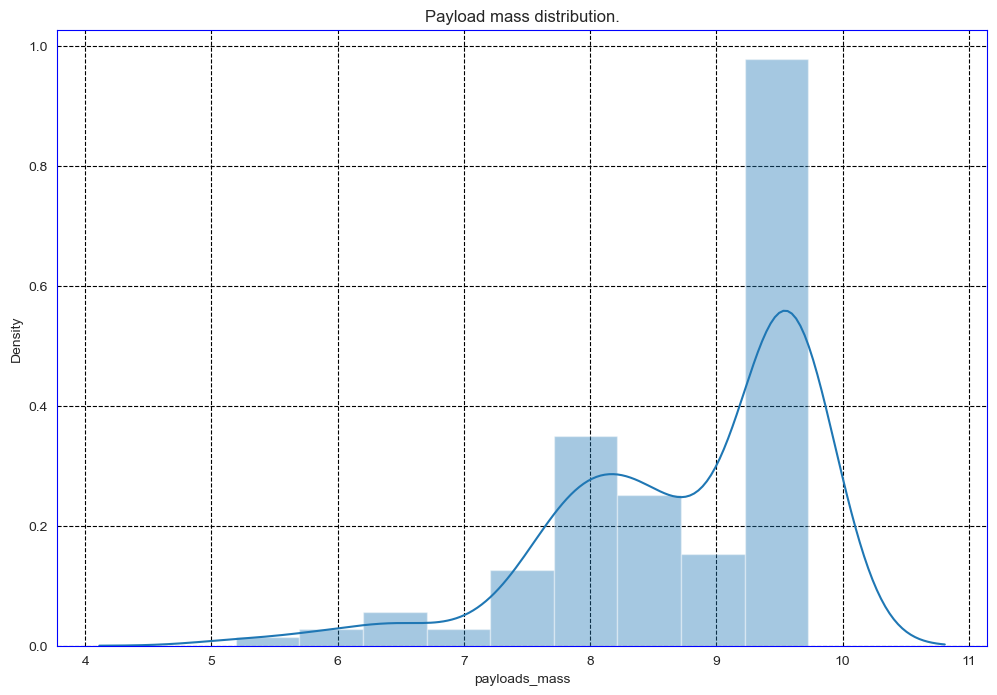

In [83]:
sns.distplot(np.log(raw_df['payloads_mass']))
plt.title("Payload mass distribution.")
plt.show()

The histogram for the price column shows that our dataset is negatively skewed. We can use discretization on this type of data distribution.

- Step 01: Find the total payloads mass range by subtracting the minimum mass from the maximum mass.

In [84]:
# YOUR CODE HERE
# raise NotImplementedError()
mass_range = raw_df['payloads_mass'].max() - raw_df['payloads_mass'].min()

In [85]:
# TEST
assert adler32(str(mass_range).encode()) == 94306658

- Step 02: Calculate the upper and upper bound for payloads

*Hint*: The minimum payloads will be rounded off to floor, while the maximum payloads will be rounded off to ceil.

In [86]:
# YOUR CODE HERE
# raise NotImplementedError()
lower_interval = np.floor(raw_df['payloads_mass'].min()).astype(int)
upper_interval = np.ceil(raw_df['payloads_mass'].max()).astype(int)

In [87]:
# TEST
assert adler32(str(lower_interval).encode()) == 20316314
assert adler32(str(upper_interval).encode()) == 52297997

- Step 3: Set up bins for visualization. We will make **4 bins** (you can understand why we need 4 bins by experimenting with 4 to 10 bins or the equation below). To generate bins, we will begin with the minimum value and then add the bin interval or length to it. To calculate the second interval, add the interval length to the upper limit of the first interval, and so on.

$$
\text{no\_of\_bins} = \dfrac{\max - \min}{h} = \dfrac{\max - \min}{2 * IQR * n^{-1/3}} = \dfrac{\max - \min}{2 * (Q3 - Q2) * n^{-1/3}}
$$

In [88]:
# YOUR CODE HERE
# raise NotImplementedError()

# Calculate the number of bins using the formula
n = len(raw_df['payloads_mass'])
IQR = raw_df['payloads_mass'].quantile(0.75) - raw_df['payloads_mass'].quantile(0.25)
h = 2 * IQR * n**(-1/3)
num_bins_formula = round((upper_interval - lower_interval) / h)

print("Number of Bins from Formula:", num_bins_formula)

total_bins = 4 
interval_size = (upper_interval - lower_interval) / total_bins

# Create bins starting from the lower_interval
bins = np.arange(lower_interval, upper_interval + interval_size, interval_size)

# Print the bins
print("Bins:", bins)

Number of Bins from Formula: 4
Bins: [  180.    4333.75  8487.5  12641.25 16795.  ]


And you should give a label for each bin such as `bin_no_1`, `bin_no_2`, etc.

In [89]:
# YOUR CODE HERE
# raise NotImplementedError()
# give a label for each bin such as `bin_no_1`, `bin_no_2`, etc
bin_labels = [f"bin_no_{i+1}" for i in range(total_bins)]
bin_labels

['bin_no_1', 'bin_no_2', 'bin_no_3', 'bin_no_4']

And maybe you want to use the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [90]:
# YOUR CODE HERE
# raise NotImplementedError()
raw_df['payloads_mass_bins'] = pd.cut(raw_df['payloads_mass'], bins=bins, labels=bin_labels, include_lowest=True)

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

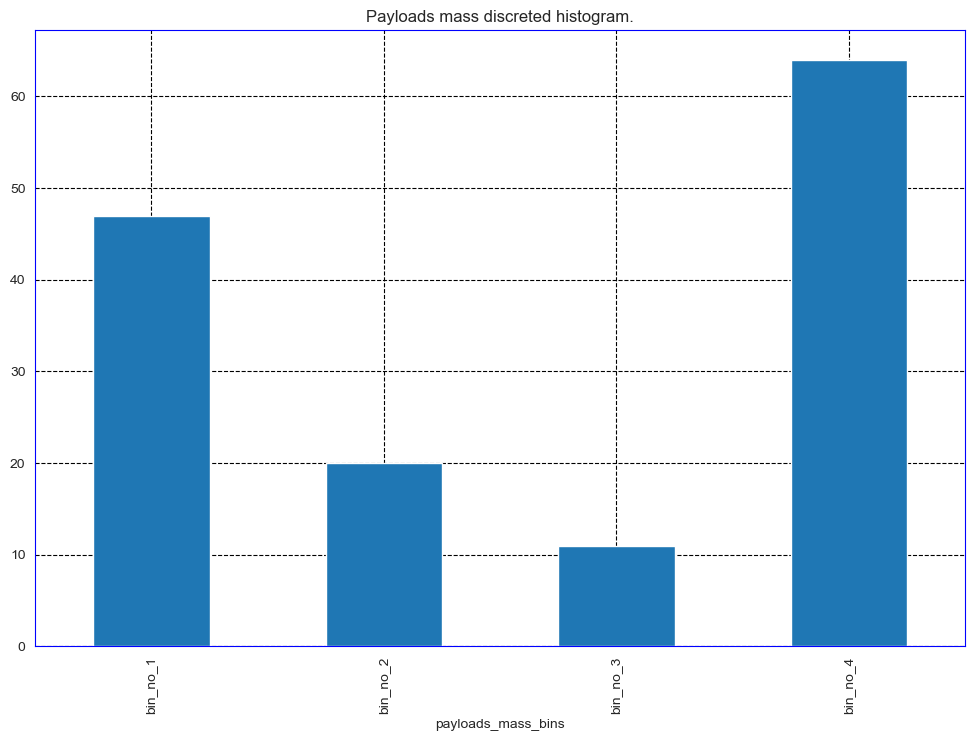

In [91]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.title("Payloads mass discreted histogram.")
plt.show()

**TODO: Describe your observation from chart**

YOUR ANSWER HERE



- The histogram illustrates the distribution of payloads mass after discretization into four bins labeled from "bin_no_1" to "bin_no_4." The count of payloads mass is highest in "bin_no_4" and lowest in "bin_no_3." Specifically, "bin_no_1" and "bin_no_4" stand out as the most prominent bins, indicating a bimodal distribution.

- This imbalance suggests that the partitioning scheme may not effectively capture the variability in payloads mass across the dataset. Ideally, a more balanced discretization would ensure that each bin contains a more equitable distribution of data points, facilitating a more accurate representation of the underlying data distribution. Therefore, the current partitioning scheme may not be optimal for accurately characterizing the payloads mass data.

### Equal Frequency Discretization

Equal frequency discretization is a discretization approach in which the bin width is automatically adjusted so that each bin contains exactly the same amount of records and has the same frequency. As a result, the bin intervals will vary. In this part, you'll apply it to the discrete `payloads_mass` column.

- Step 01: To convert a continuous column into equal frequency discretized bins, you maybe want to use the ["qcut()" method](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

In [92]:
# YOUR CODE HERE
# raise NotImplementedError()
raw_df['payloads_mass_bins'], bin_edges = pd.qcut(raw_df['payloads_mass'], q=total_bins, retbins=True, labels=False, precision=3, duplicates='raise')

- Step 02: Create bin labels

In [93]:
# YOUR CODE HERE
# raise NotImplementedError()
bin_labels = [f"bin_no_{i+1}" for i in range(total_bins)]

- Step 03: Apply the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [94]:
# YOUR CODE HERE
# raise NotImplementedError()
raw_df['payloads_mass_bins'] = pd.cut(raw_df['payloads_mass'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Group the dataframe by 'payloads_mass_bins' and calculate the mean for each group
bin_means = raw_df.groupby('payloads_mass_bins')['payloads_mass'].mean().astype(int)

# Convert the resulting series to a dictionary
bin_means_dict = bin_means.to_dict()

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

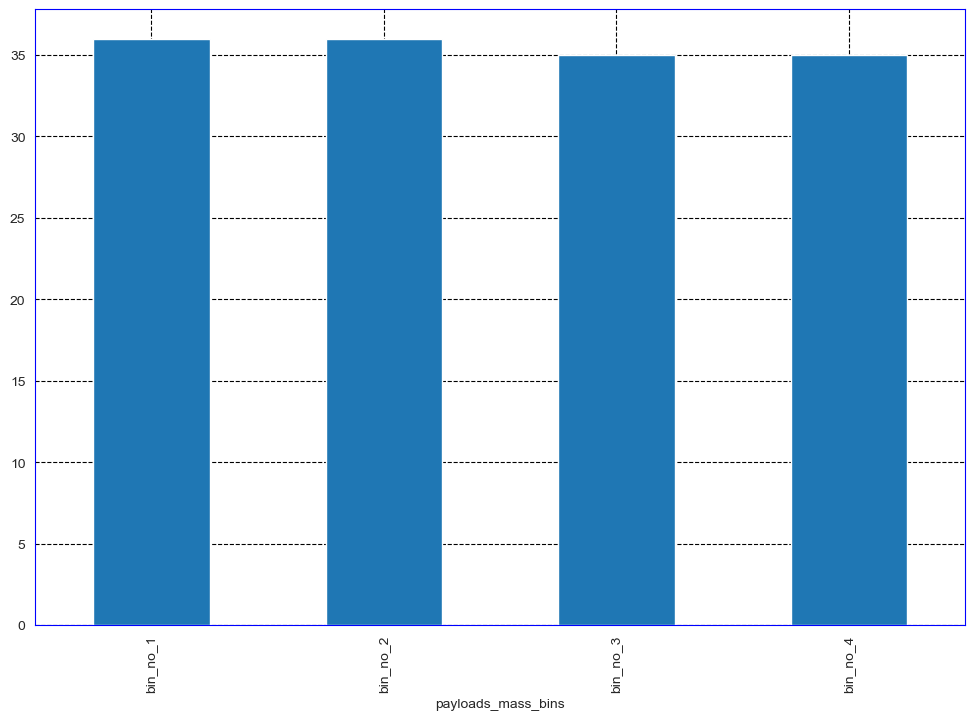

In [95]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.show()

**Bonus points** Study about K-Means Discretization, and Decision Tree Discretization.

YOUR ANSWER HERE (Optional)

- K-Means Discretization involves segmenting continuous data into a predefined number of clusters, where each cluster represents a distinct range or category. This technique iteratively assigns data points to clusters based on their similarity, aiming to minimize the within-cluster sum of squares. K-Means Discretization is advantageous in situations where the underlying data distribution is not well understood or when there is a need to convert continuous variables into categorical ones for analysis or modeling purposes. However, it may struggle with non-linear data distributions or clusters of varying densities.

- Decision Tree Discretization, on the other hand, entails recursively partitioning the feature space using decision tree splits. It identifies optimal thresholds to discretize continuous variables based on criteria such as information gain or impurity reduction. This approach is particularly useful when the relationships between features and the target variable are nonlinear or when interpretable rules for data discretization are desired. Decision tree discretization offers the flexibility to handle complex data distributions and interactions among variables, making it a valuable tool for data preprocessing in machine learning tasks, especially when working with structured datasets with heterogeneous feature types.

### K-Means++ Discretization

In code cells below, I will apply K-Means++ algorithm to cluster the `payloads_mass` column into 4 clusters. K-Means++ is a upgraded centroid initialization technique apply probability to select the initial centroids. The farther the distance from the centroids which have been selected, the higher the probability of being selected.

- Step 01: Initialize centroids using K-Means++ algorithm

In [96]:
# # YOUR CODE HERE
# # raise NotImplementedError()

def initialize_centroids_kmeans_pp(data, k):
    centroids = [data.iloc[np.random.choice(len(data))].values]

    for _ in range(1, k):
        distances = np.linalg.norm(data.values[:, None] - np.array(centroids), axis=-1)
        min_distances = np.min(distances, axis=-1)
        probabilities = min_distances / np.sum(min_distances)
        new_centroid_index = np.random.choice(len(data), p=probabilities)
        centroids.append(data.iloc[new_centroid_index].values)

    return pd.DataFrame(np.array(centroids), columns=data.columns)

- Step 02: Assign data points to the nearest centroid

In [97]:
def assign_to_centroids(data, centroids):
    distances = np.linalg.norm(data.values[:, None] - centroids.values, axis=-1)
    labels = np.argmin(distances, axis=-1)
    return labels

- Step 03: Update centroids

In [98]:
def update_centroids(data, labels, k):
    new_centroids = []
    for i in range(k):
        cluster_points = data[labels == i]
        if len(cluster_points) > 0:
            new_centroid = cluster_points.mean().values
        else:
            # Replace the centroid with the centroid that has the average value of the remaining centroids
            new_centroid = data[labels != i].mean().values
        new_centroids.append(new_centroid)
    return pd.DataFrame(new_centroids, columns=data.columns)

- Step 04: K-Means++ Discretization

In [99]:
def k_means_discretization(data, k, max_iter=100):
    centroids = initialize_centroids_kmeans_pp(data, k)
    convergence_interval = 0
    
    for _ in range(max_iter):
        labels = assign_to_centroids(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        
        # Check convergence condition
        if np.allclose(new_centroids, centroids, atol=convergence_interval):
            break
        
        # Update centroids
        centroids = new_centroids
    
    return labels

- Step 05: Apply K-Means++ Discretization

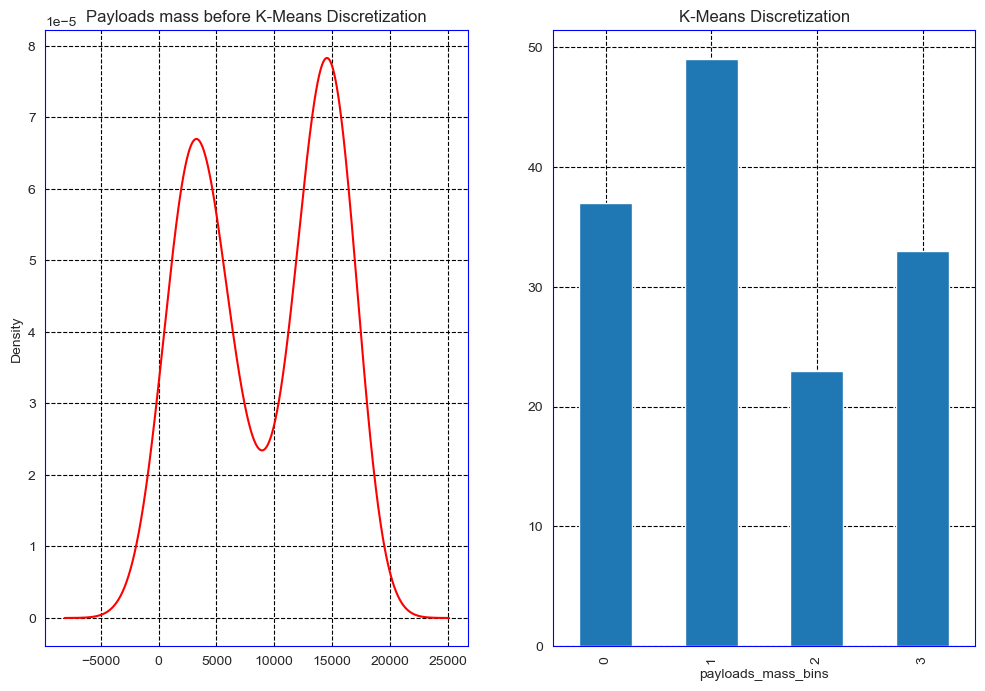

In [100]:
# get all data for testing
data = raw_df[['payloads_mass']]

# Applying K-Means Discretization
k = 4
labels = k_means_discretization(data, k)

# Plotting the results
fig, axes = plt.subplots(1, 2)

data['payloads_mass'].plot(kind='kde', ax=axes[0], color='red')
axes[0].set_title("Payloads mass before K-Means Discretization")

data['payloads_mass_bins'] = labels
data.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar(ax=axes[1])
axes[1].set_title("K-Means Discretization")

plt.show()

### Decision Tree Discretization

In code cells below, I will apply decision tree discretization to train a decision tree model basing on the `raw_df` dataframe with target column is `payloads_mass_bins`. The values in this target column were obtained using the equal frequency discretization method applied above. In the next step, I will predict `discretized_payloads_mass_bins` for the `unknow_mass_df` dataframe with 4 label types from bin_no_1 to bin_no_4.  Finally, I will fill the missing values in the `payloads_mass` column in `unknow_mass_df` dataframe by the mean value of the corresponding label achieved in the `raw_df` dataframe and write the result to a CSV file.

The reason of using label encoding over one-hot encoding: In decision tree discretization with nominal attributes, label encoding is preferred over one-hot encoding despite the risk of introducing a wrong ordinal relationship. This preference arises due to the nature of decision trees, which split data based on feature thresholds, not feature distance. Label encoding preserves the original order of categories, allowing the decision tree algorithm to find meaningful splits. One-hot encoding, on the other hand, creates binary columns for each category, potentially leading to sparse representations and less effective splits. Therefore, label encoding is chosen to maintain the interpretability and effectiveness of the decision tree model in handling nominal attributes.

- Step 01: Encode the nominal attributes of the raw_df and unknow_mass_df using LabelEncoder

In [101]:
# Define the columns to encode
nominal_attributes = ['outcome', 'rocket_name', 'launchpad_name', 'launchpad_region', 'landpad_name', 'landpad_type', 'landpad_region', 'payloads_type', 'payloads_orbit']

# Filter raw_df and unknow_mass_df to include only the specified columns
raw_df_filtered = raw_df[nominal_attributes]
unknow_mass_df_filtered = unknow_mass_df[nominal_attributes]

# Combine raw_df and unknow_mass_df for encoding consistency
combined_df = pd.concat([raw_df_filtered, unknow_mass_df_filtered])

# Apply LabelEncoder only to the specified nominal attributes
label_encoder = LabelEncoder()
for column in nominal_attributes:
    combined_df[column] = label_encoder.fit_transform(combined_df[column])

# Split the combined_df back into raw_df_encoded and unknow_mass_df_encoded
raw_df_encoded = combined_df.iloc[:len(raw_df)]
unknow_mass_df_encoded = combined_df.iloc[len(raw_df):]

# Reorder the columns to match the original order
ordered_columns_raw = raw_df.columns.tolist()  

# Create new columns in raw_df_encoded
for column in raw_df.columns.difference(nominal_attributes):
    raw_df_encoded[column] = raw_df[ordered_columns_raw].loc[:, column].values

# Reorder the columns to match the original order
ordered_columns_unknow_mass = unknow_mass_df.columns.tolist()

# Create new columns in unknow_mass_df_encoded
for column in unknow_mass_df.columns.difference(nominal_attributes):
    unknow_mass_df_encoded[column] = unknow_mass_df[ordered_columns_unknow_mass].loc[:, column].values

- Step 02: Extract feature columns and target column

In [102]:
# YOUR CODE HERE
# raise NotImplementedError()

feature_columns = ['rocket_name', 'launchpad_name', 'launchpad_region', 
                   'landpad_name', 'landpad_type', 'landpad_region', 'outcome', 'payloads_type', 'payloads_orbit']
target_column = 'payloads_mass_bins'

X = raw_df_encoded[feature_columns]
y = raw_df_encoded[target_column]

- Step 03: Train Decision Tree Classifier

In [103]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

- Step 04: Predict labels for unknown data

In [104]:
unknown_X = unknow_mass_df_encoded[feature_columns]
predicted_labels = clf.predict(unknown_X)

- Step 05: Apply discretization and fill the missing values in the unknow_mass_df

In [105]:
unknow_mass_df_encoded['discretized_' + target_column] = predicted_labels
def map_bin_to_mean(bin_name):
    return bin_means_dict.get(bin_name, np.nan)

unknow_mass_df_encoded['payloads_mass'] = unknow_mass_df_encoded['discretized_payloads_mass_bins'].map(map_bin_to_mean)

unknow_mass_df['payloads_mass'] = unknow_mass_df_encoded['payloads_mass'].fillna(unknow_mass_df['payloads_mass'])

- Step 06: Write the final result to a CSV file

In [106]:
unknow_mass_df.to_csv("./data/unknow_mass_spaceX_launch.csv", index=False)

In [107]:
# Exclude "bins" for next section
raw_df = raw_df.drop(["payloads_mass_bins"], axis=1)

# Exclude "nominal_attributes" for next section

nominal_attributes = ['outcome', 'launch_name', 'rocket_name', 'launchpad_name', 'launchpad_region',
                   'landpad_name', 'landpad_type', 'landpad_region', 'payloads_type', 'payloads_orbit']

raw_df = raw_df.drop(nominal_attributes, axis=1)

## Outlier handling techniques (1 pts)

There are some techniques that you can use to handle outliers:
- Totally removing the outliers from the dataset.
- Treating outliers as missing values, and then apply any techniques to filter them.
- Applying discretization techniques to the dataset that will include the outlier along with other data points at the tail.
- Capping and replacing them with maximum and minimum values that can be found via some techniques.

### Outlier Trimming

Outlier trimming is an outlier handling technique that simply removes the outliers beyond a certain threshold value. And the easiest way to determine this threshold value is to use the IQR.

Let’s remove the outliers from the `payloads_mass` column of this dataset.

- Step 01: Using box plot to visualize the outliers.

<Axes: ylabel='payloads_mass'>

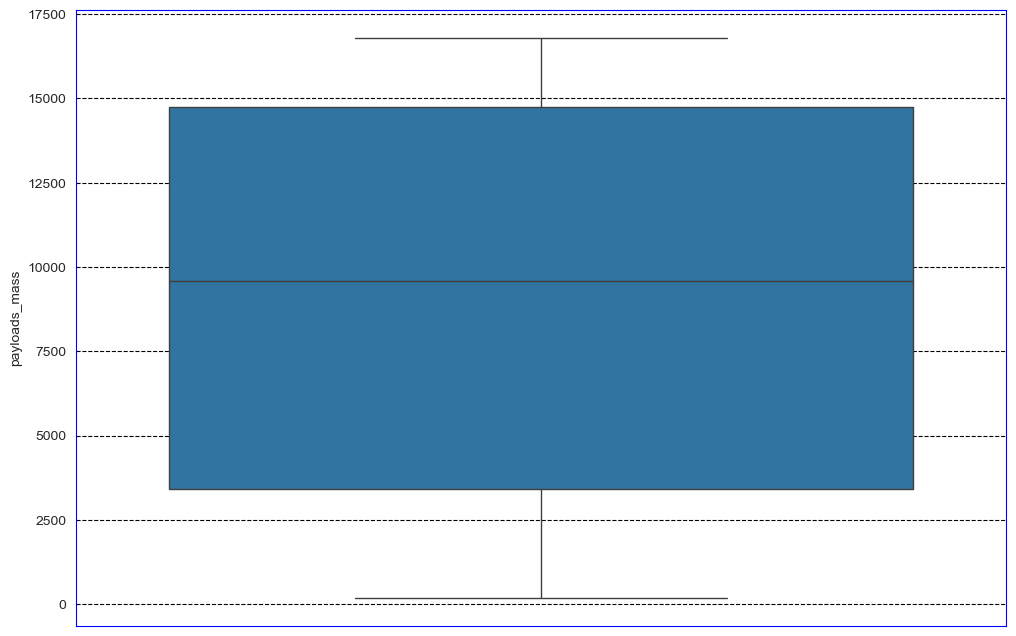

In [108]:
# YOUR CODE HERE
# Using box plot to visualize the outliers of payloads_mass
sns.boxplot(y=raw_df['payloads_mass'])

Very lucky, we have no outliers. :D

- Step 02: Calculate IQR and determine the lower bound and upper bound for `payloads_mass`

In [109]:
IQR = raw_df["payloads_mass"].quantile(0.75) - raw_df["payloads_mass"].quantile(0.25)

lower_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.25) - (IQR * 1.5)
upper_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.75) + (IQR * 1.5)

print(f"The lower bound for payloads limitation: {lower_payloads_mass_limit}")
print(f"The upper bound for payloads limitation: {upper_payloads_mass_limit}")

The lower bound for payloads limitation: -13635.625
The upper bound for payloads limitation: 31797.375


- Step 03: Construct rule for trimming outliers.

In [110]:
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_payloads_mass_limit,
    True,
    np.where(raw_df["payloads_mass"] < lower_payloads_mass_limit, True, False),
)

- Step 04: Trimming outliers

In [111]:
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

raw_df.shape, payloadsmass_outliers.shape

((142, 185), (142,))

TODO: What are the advantages and disadvantages of outlier trimming?

YOUR ANSWER HERE

`Advantages`:

- Improved model performance: Outliers can skew statistical analyses and modeling results, leading to inaccurate predictions. By removing outliers, the model's performance can improve, resulting in more reliable insights and predictions.

- Enhanced data distribution: Outliers can distort the distribution of data, affecting the mean, variance, and other measures of central tendency. Trimming outliers can help in achieving a more representative data distribution, which is essential for many statistical analyses.

- Mitigated impact on algorithms: Outliers can disproportionately influence the parameters of certain algorithms, such as linear regression or clustering. Trimming outliers can mitigate their impact, ensuring that the model is not overly influenced by extreme values.


`Disadvantages`:

- Loss of information: Removing outliers results in the loss of potentially valuable information contained within those data points. In some cases, outliers may represent rare but meaningful occurrences or anomalies that are crucial for understanding the underlying process.

- Bias potential: The decision of which data points to consider as outliers and how to trim them can introduce bias into the analysis. Subjective criteria for outlier detection may lead to the removal of data points that are valid and relevant to the analysis.

- Impact on generalization: Trimming outliers can affect the generalization ability of the model, particularly if the outliers represent genuine data points that occur in real-world scenarios. Removing such outliers may lead to a model that performs well on the training data but fails to generalize effectively to unseen data.

In summary, while outlier trimming can improve the performance and reliability of statistical analyses and models, it should be approached with caution to avoid the loss of valuable information and potential bias in the results.

### Outlier Capping Using IQR

I am very smart to use IQR to demonstrate the above technique, and for this section, I don't have to demonstrate it again. :)

TODO: Tell me, what is the IQR distance normally used to cap outliers via IQR?

YOUR ANSWER HERE

Interquartile Range (IQR) is commonly used to identify and cap outliers in a dataset. Typically, outliers are defined as data points that fall below $ Q1 - 1.5 \times \text{IQR} $ or above $ Q3 + 1.5 \times \text{IQR} $, where $Q1 $ and $ Q3 $ represent the first and third quartiles, respectively, and $\text{IQR}$ is the interquartile range. This range covers approximately 99.3% of the data in a normally distributed dataset and is often used as a threshold for identifying outliers.

### Outlier Capping Using Mean & Standard Deviation

Instead of using the IQR method, the upper and lower thresholds for outliers can be calculated via the mean and standard deviation method.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `mean` + 3 * `sigma`

`lower_bound` = `mean` - 3 * `sigma`

In [112]:
# YOUR CODE HERE
# raise NotImplementedError()

mean = raw_df["payloads_mass"].mean()
sigma = raw_df["payloads_mass"].std()
upper_bound = mean + 3 * sigma
lower_bound = mean - 3 * sigma

- Step 02: Construct rule for trimming outliers.

In [113]:
# YOUR CODE HERE
# raise NotImplementedError()
outliers = (raw_df["payloads_mass"] > upper_bound) | (raw_df["payloads_mass"] < lower_bound)

- Step 03: Trimming outliers

In [114]:
# YOUR CODE HERE
# raise NotImplementedError()
raw_df = raw_df[~outliers]

TODO: What are the advantages and disadvantages of using mean and standard deviation? Tell me, what is the quartile distance normally used to cap outliers via mean and standard deviation? Give your explaination.

YOUR ANSWER HERE

`Advantages`:

- Simple and Easy to Implement: Calculating the mean and standard deviation is straightforward and requires minimal computational effort.

- Sensitive to Changes: Mean and standard deviation are sensitive to changes in the dataset, making them effective for detecting outliers that deviate significantly from the majority of the data.

- Reflects Data Distribution: The standard deviation provides information about the spread of data around the mean, offering insights into the variability of the dataset.

`Disadvantages`:

- Sensitive to Skewed Data: Mean and standard deviation are influenced by extreme values and are sensitive to data skewness, which can lead to inaccurate estimates of central tendency and dispersion in skewed distributions.

- Assumption of Normality: Mean and standard deviation assume a normal distribution of data, which may not always hold true, especially for non-parametric datasets. Using them on non-normally distributed data can lead to biased estimates and inappropriate outlier detection.

- Not Robust to Large Outliers: In datasets with large outliers, the mean and standard deviation may not accurately capture the central tendency and variability of the majority of the data, leading to ineffective outlier detection.

`The quartile distance normally used to cap outliers`: The quartile distance typically used to cap outliers via mean and standard deviation is three standard deviations from the mean in both the upper and lower directions. This corresponds to the range [-3σ, +3σ] around the mean, where σ represents the standard deviation. This range covers approximately 99.7% of the data in a normally distributed dataset and is commonly used as a threshold for identifying extreme values. However, this approach may not be suitable for all datasets, especially those with non-normal distributions or substantial skewness.

### Outlier Capping Using Quantiles

Furthermore, the upper and lower thresholds for outliers can be calculated via quantile information. We can use it to find outliers.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `quantile` 90%

`lower_bound` = `quantile` 10%

In [115]:
# YOUR CODE HERE
# raise NotImplementedError()
upper_bound = raw_df["payloads_mass"].quantile(0.90)
lower_bound = raw_df["payloads_mass"].quantile(0.10)

- Step 02: Construct rule for trimming outliers.

In [116]:
# YOUR CODE HERE
# raise NotImplementedError()
outliers = (raw_df["payloads_mass"] > upper_bound) | (raw_df["payloads_mass"] < lower_bound)
print(upper_bound, lower_bound)

15600.0 2200.0


- Step 03: Trimming outliers

In [117]:
# YOUR CODE HERE
# raise NotImplementedError()
print(raw_df.shape)
raw_df = raw_df[~outliers]
print(raw_df.shape)

(142, 185)
(120, 185)


TODO: What are the advantages and disadvantages of using Quantiles?

YOUR ANSWER HERE

`Advantages`:

- Robustness: Quantiles are robust to outliers, making them suitable for datasets with extreme values or skewed distributions. They provide a more reliable measure of central tendency and dispersion compared to summary statistics like the mean and standard deviation.

- Flexibility: Quantiles allow for the analysis of data across various distributions and datasets, enabling comparisons and assessments of variability and spread in different contexts.

- Versatility: Quantiles offer a versatile approach to outlier detection, as they can be tailored to specific needs by selecting different quantile thresholds (e.g., quartiles, deciles, percentiles).

`Disadvantages`:

- Sensitivity to Distribution: While quantiles are robust to outliers, they may not always effectively capture extreme values in datasets with complex or non-standard distributions. Certain quantiles may underestimate or overestimate the presence of outliers, depending on the shape and characteristics of the data.

- Subjectivity in Threshold Selection: The choice of quantile thresholds can impact outlier detection outcomes. Different quantile levels (e.g., 10th, 25th, 50th percentiles) may lead to different interpretations of outlier presence, requiring careful consideration and validation.

- Limited Representation: In some cases, quantiles may provide a limited representation of the data's variability, especially when dealing with large datasets or extreme tails. Certain extreme values may not be adequately captured by the selected quantiles, leading to potential biases or inaccuracies in analysis.

## Feature scaling techniques (2 pts)

As you know, in any dataset, there are also many different attributes. And the attributes can have different magnitudes, and statistical information includes variances, standard deviations, mean values, etc. The difference in the scale or magnitude of attributes can actually affect statistical models, such as:
- The dominance of large-scale variables
- Gradient descent algorithm for convergence
- Eclidean distance affects similarity among features.

In this section, I give you some techniques that can be applied in some situations.

### Standardisation

Standardization is the processing of centering the variable at zero and standardizing the data variance to 1. Now, I will you an example for numerical variable in `raw_df` and visualize on `payloads_mass` attributes.

- Step 01: Init

In [118]:
scaler = StandardScaler()

- Step 02: Fitting

In [119]:
scaler.fit(raw_df.drop(["uct_time"], axis=1))

StandardScaler()

- Step 03: Transform data

In [120]:
raw_df_scaled = scaler.transform(raw_df.drop(["uct_time"], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

- Step 04: Test

In [121]:
raw_df_scaled.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,outcome_Failure,outcome_Success,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-8 & SkySat 16-18,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_n

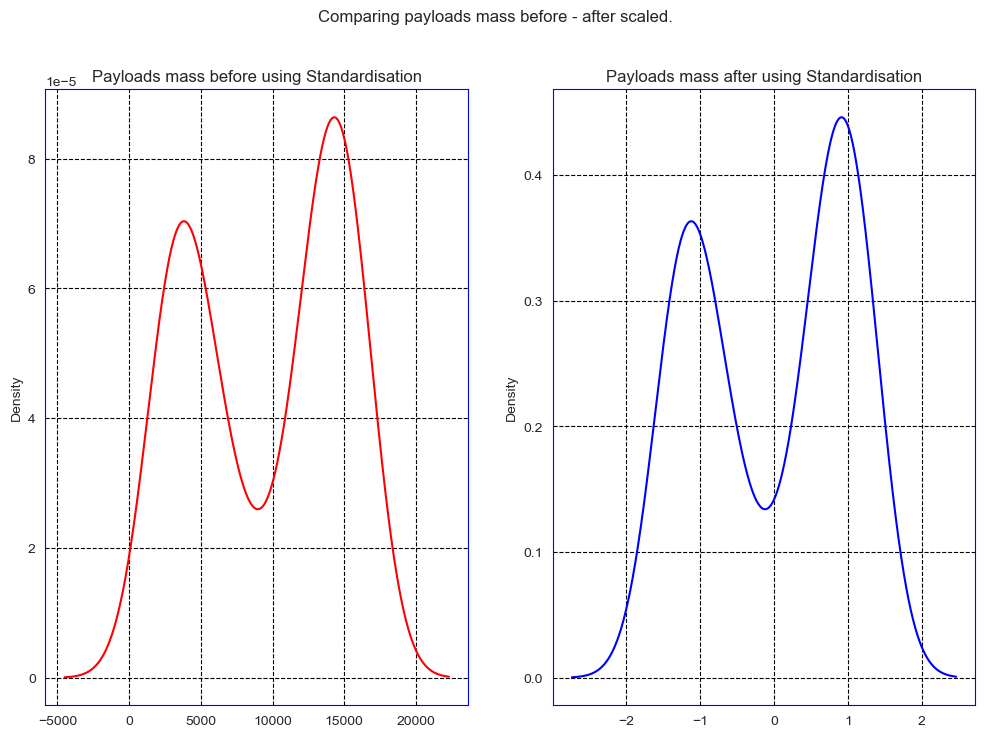

In [122]:
fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: Describe your observation from chart**

YOUR ANSWER HERE

`Observations`:

- Similarity in Shape: Both curves exhibit a consistent spread of data, implying that standardization does not significantly alter the variability or dispersion of payloads mass values. This consistency ensures that the relative relationships and patterns within the data remain intact.

- Shift in Scale: Before standardization, the range of payloads mass values is wider (-5000 to 20000), while after standardization, it is narrower (-3 to 2.5). There is a noticeable compression in the scale of the x-axis after standardization. This compression reflects the rescaling effect of standardization, which centers the data around zero with a standard deviation of 1.

-> The graph demonstrates that standardization effectively preserves the overall distribution characteristics of payloads mass data while standardizing its scale for improved interpretability and analysis.

### Min/Max Scaling

Min/max scaling subtracts each value by the minimum value, and then divide the result by the difference of minimum and maximum value in the dataset.

TODO: Use `sckit-learn` for applying min/max scaling to the `payloads_mass` column.

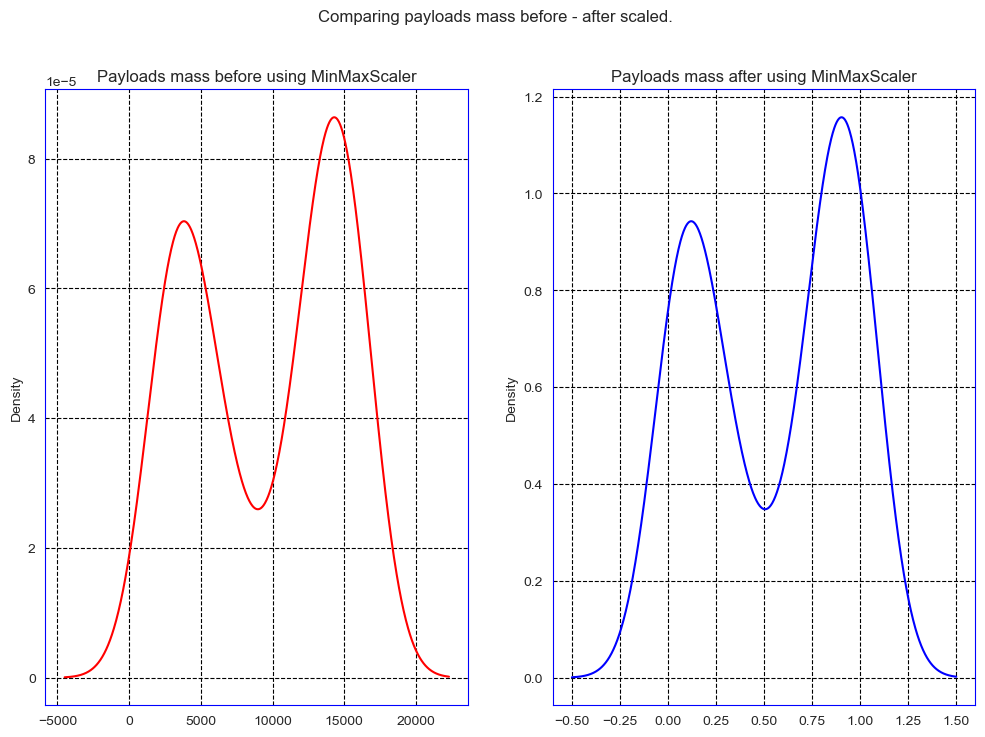

In [123]:
# YOUR CODE HERE
# raise NotImplementedError()
scaler = MinMaxScaler()

scaler.fit(raw_df[["payloads_mass"]])

raw_df_scaled = scaler.transform(raw_df[["payloads_mass"]])

raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = ["payloads_mass"])

# visualizing the results
fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using MinMaxScaler")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using MinMaxScaler")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

`Observations`:

- Shape Consistency: Both distributions display a similar shape, indicating that MinMaxScaler() maintains the original variability and spread of payloads mass values. This consistency suggests that the relative relationships and patterns within the data remain unchanged, facilitating reliable analysis.

- Scale Transformation: Prior to scaling, payloads mass spans a wider range (-5000 to 20000), which contracts to a narrower range (-0.5 to 1.5) post-scaling. This compression of the x-axis reflects the rescaling effect of MinMaxScaler(), which normalizes the data within a defined range. The y-axis transformation from 0 to 9 * 10^-5 to 0 to 1.2 further illustrates this rescaling, enhancing interpretability.

-> The graph illustrates that MinMaxScaler() effectively standardizes the scale of payloads mass data while preserving its underlying distribution characteristics, facilitating improved analysis and interpretation.

### Mean Normalization

Mean normalization is very similar to min/max scaling.

**TODO: Tell me what is the difference between mean normalization and min/ max scaling.**

*Give your obervation here*

`The difference`: 
- Mean normalization involves adjusting the values of a feature based on its mean, minimum, and maximum values. It centers the data around zero by subtracting the mean value and scales it to a range defined by the difference between the maximum and minimum values. This technique results in a distribution with a mean of zero and a range typically between -1 and 1. Mean normalization preserves the shape of the distribution while centering it around zero.

- Min/max scaling rescales the feature values to a specific range, often between 0 and 1. It achieves this by subtracting the minimum value from each data point and dividing by the range (the difference between the maximum and minimum values). Min/max scaling preserves the relative distances between data points but does not center the data around zero.

-> The key difference lies in how these techniques handle the centering of data: mean normalization centers the data around zero, while min/max scaling rescales it to a predefined range without centering.

TODO: Use `sckit-learn` for applying mean normalization to the `payloads_mass` column.

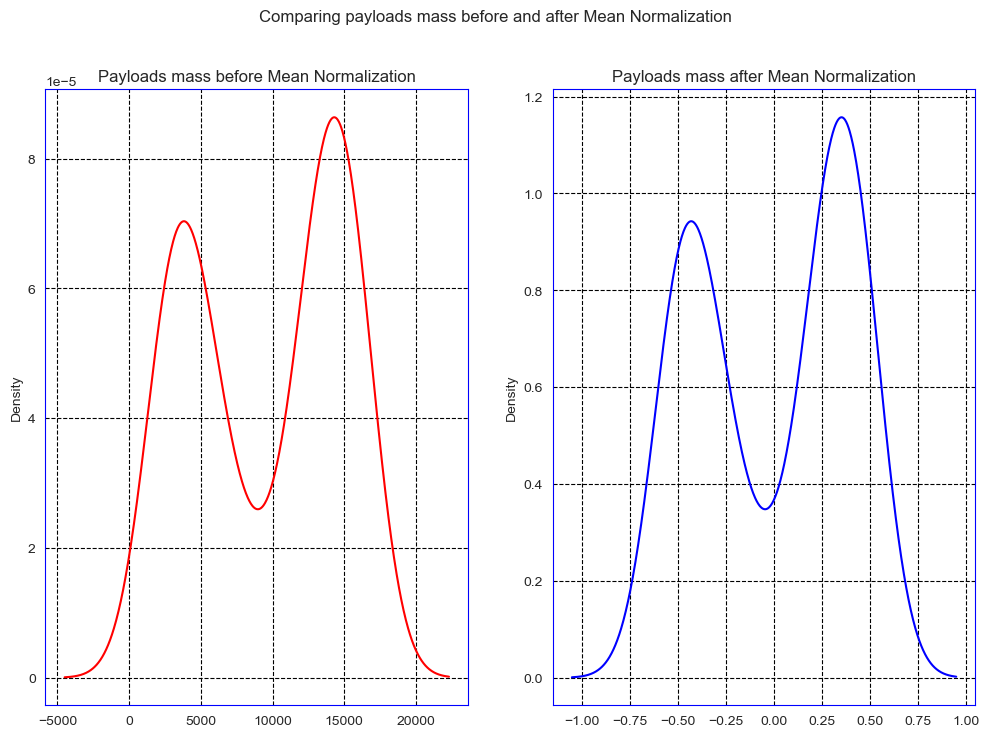

In [124]:
# YOUR CODE HERE
# raise NotImplementedError()

# Calculate the mean, min, and max
mean_value = raw_df["payloads_mass"].mean()
min_value = raw_df["payloads_mass"].min()
max_value = raw_df["payloads_mass"].max()

# Apply Mean Normalization using the specified formula
raw_df_mean_normalized = (raw_df["payloads_mass"] - mean_value) / (max_value - min_value)

# Visualizing the results
fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before Mean Normalization")

raw_df_mean_normalized.plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after Mean Normalization")

fig.suptitle("Comparing payloads mass before and after Mean Normalization")

plt.show()


**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE


`Observations`:

- Shape Consistency: The curves before and after Mean Normalization exhibit strikingly similar shapes, indicating that the normalization process maintains the original distribution and variability of payloads mass data. This consistency implies that the relative patterns and relationships within the dataset remain unchanged, ensuring the reliability of subsequent analyses.

- Scale Adjustment: Before normalization, payloads mass ranges from -5000 to 20000, while post-normalization, it scales to a narrower range of -1 to 1 on the x-axis. Similarly, the y-axis, representing density, transforms from a range of 0 to 9 * 10^-5 to 0 to 1.2. This transformation reflects the rescaling effect of Mean Normalization, aligning the data within a standardized range for enhanced interpretability.

-> The graph illustrates that Mean Normalization effectively standardizes the scale of payloads mass data while preserving its inherent distribution characteristics, thereby facilitating accurate analysis and interpretation.

### Maximum Absolute Scaling

Maximum absolute scaling is probably the simplest of all the scaling techniques. In maximum absolute scaling, each data point is simply divided by the maximum value.

TODO: Use `sckit-learn` for applying maximum absolute scaling to the `payloads_mass` column.

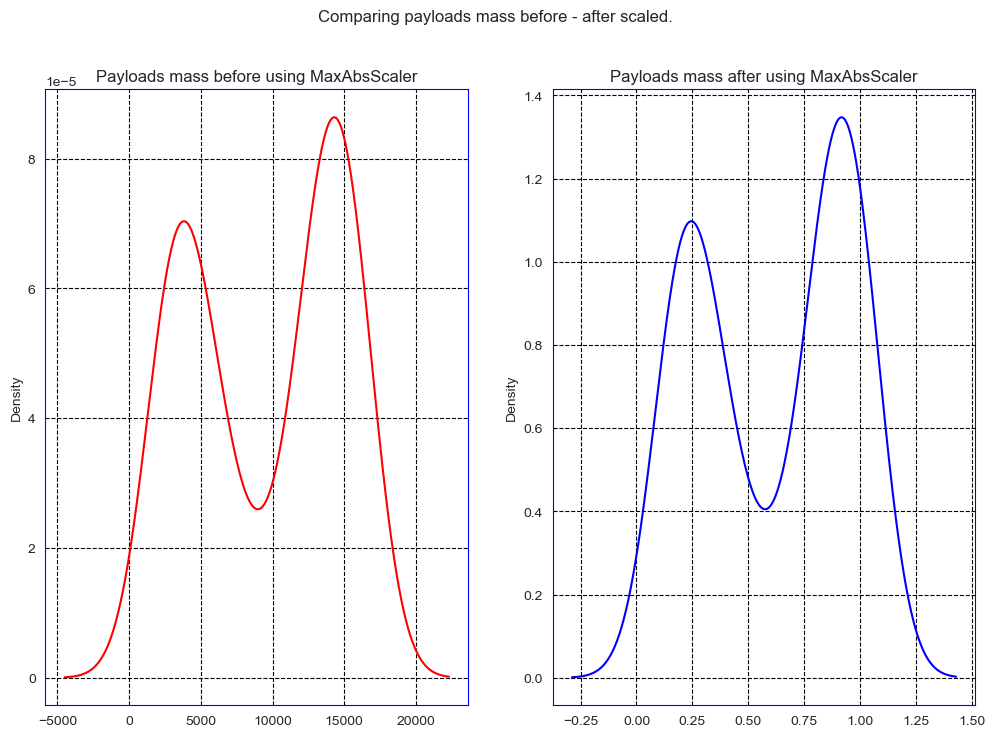

In [125]:
# YOUR CODE HERE
# raise NotImplementedError()
scaler = MaxAbsScaler()

scaler.fit(raw_df[["payloads_mass"]])

raw_df_scaled = scaler.transform(raw_df[["payloads_mass"]])

raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = ["payloads_mass"])

# visualizing the results
fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using MaxAbsScaler")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using MaxAbsScaler")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

- Shape Consistency: Both plots exhibit strikingly similar distributions, indicating that the MaxAbsScaler preserves the original shape and spread of payloads mass values. This consistency underscores the scaler's ability to maintain the integrity of the data despite the scaling process.

- Scale Adjustment: In terms of scale transformation, prior to scaling, the payloads mass spans a wider range from -5000 to 20000, which condenses to a narrower range of -0.25 to 1.5 post-scaling. The compression of the x-axis reflects the rescaling effect of MaxAbsScaler, which normalizes the data based on the absolute maximum value. Additionally, the y-axis transformation from 0 to 9 * 10^-5 to 0 to 1.4 further highlights this rescaling, enhancing the interpretability of the data.

-> Since the payloads mass data doesn't contain outliers, MaxAbsScaler's straightforward approach of scaling by the absolute maximum value contributes to a clearer and more concise representation of the distribution and preserves its original distribution characteristics, facilitating enhanced analysis and interpretation.

### Median and Quantile Scaling

In median and quantile scaling, the mean of the dataset is subtracted from all the data points, and the result is divided by the difference between the first quartile and the 3rd quartile.

TODO: Use `sckit-learn` for applying median and quantile scaling to the `payloads_mass` column.

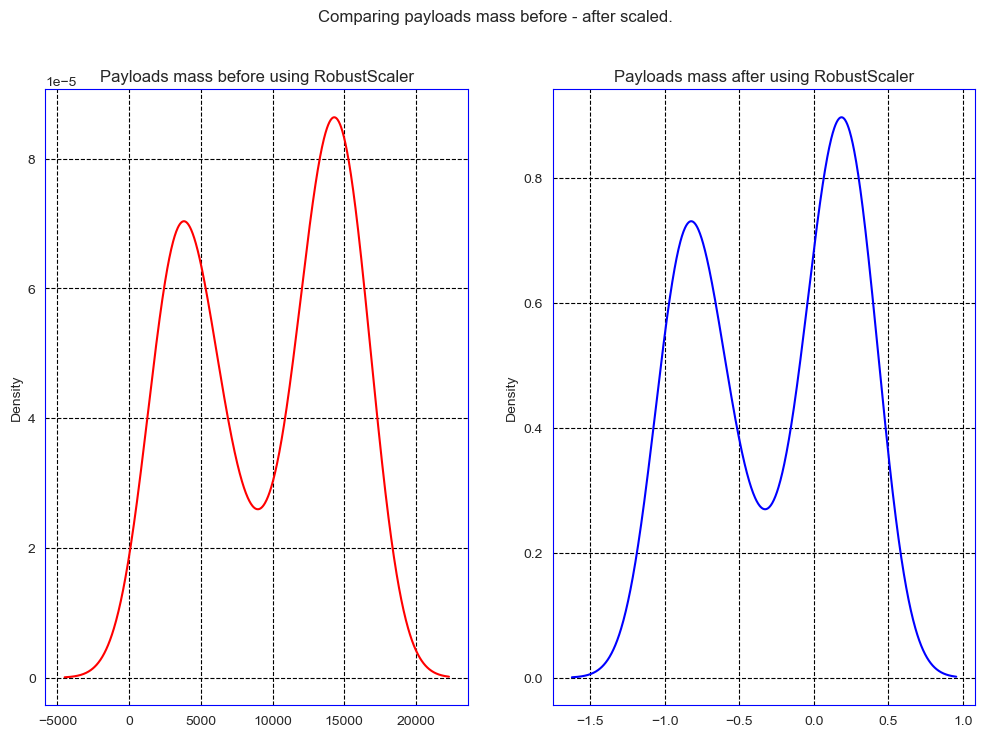

In [126]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(raw_df[["payloads_mass"]])

raw_df_scaled = scaler.transform(raw_df[["payloads_mass"]])

raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = ["payloads_mass"])

# visualizing the results
fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using RobustScaler")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using RobustScaler")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

- Shape Consistency: Both plots depict remarkably similar distributions, indicating that RobustScaler effectively maintains the original shape and spread of payloads mass values. This consistency underscores the robustness of the scaler in preserving data integrity, especially in the presence of outliers.

- Scale Adjustment: In terms of scale transformation, prior to scaling, the payloads mass spans a wide range from -5000 to 20000, which contracts to a narrower range of -1.5 to 1 post-scaling. This compression of the x-axis reflects the rescaling effect of RobustScaler, which scales the data based on the median and interquartile range (IQR), making it robust to outliers. Additionally, the y-axis transformation from 0 to 9 * 10^-5 to 0 to 0.9 further illustrates this rescaling, enhancing interpretability.

-> The graph demonstrates that RobustScaler effectively standardizes the scale of payloads mass data while preserving its distribution characteristics, enabling reliable analysis and interpretation, particularly in datasets with outliers.

### Vector Unit Length Scaling

In unit length scaling, a new feature vector is created by dividing feature vector by the Manhattan distance (l1 norm), or by the Euclidian distance (l2 norm).

TODO: Use `sckit-learn` for applying vector unit length scaling to the `payloads_mass` column.

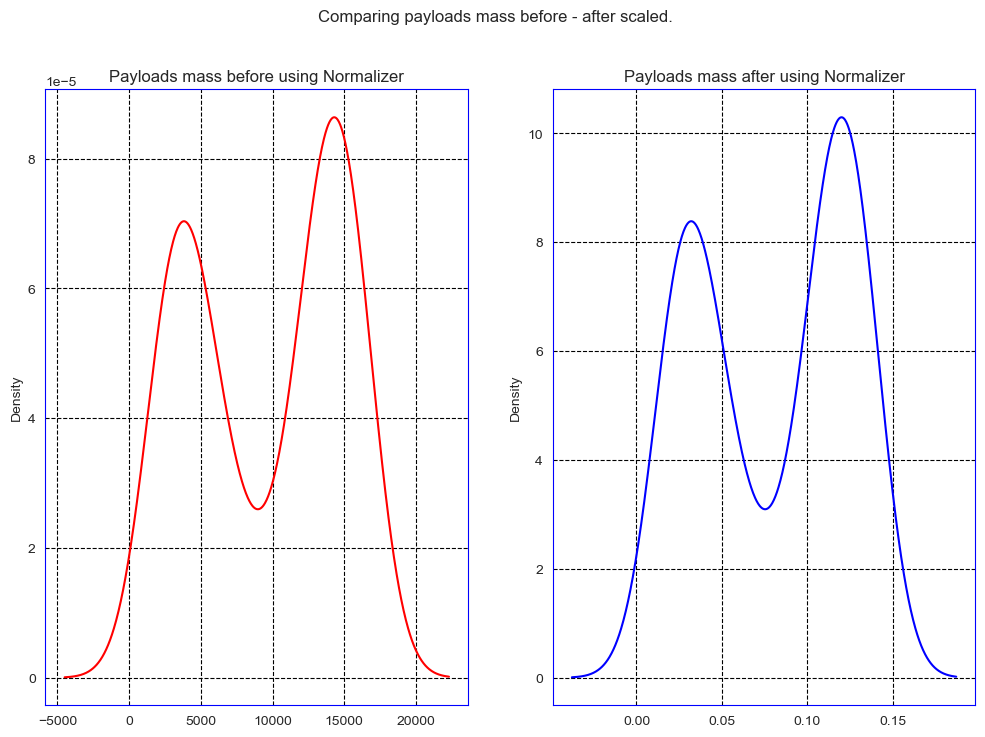

In [127]:
# YOUR CODE HERE
# raise NotImplementedError()
# Extract the "payloads_mass" column as a vector
payloads_mass_vector = raw_df["payloads_mass"].values

# Calculate the L2 norm of the vector
l2_norm = np.sqrt(np.sum(payloads_mass_vector ** 2))

# Normalize the vector
normalized_payloads_mass = payloads_mass_vector / l2_norm

# Convert the result to a DataFrame
raw_df_scaled = pd.DataFrame({"payloads_mass": normalized_payloads_mass})

# Visualize the results
fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Normalizer")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Normalizer")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

YOUR ANSWER HERE

- Shape Consistency: Both plots exhibit nearly identical shapes, indicating that Vector Unit Length Scaling maintains the original distribution of payloads mass values accurately. This consistency underscores the effectiveness of the scaler in preserving data integrity.

- Scale Adjustment: Regarding scale transformation, prior to scaling, the payloads mass ranges from -5000 to 20000, which narrows down to -0.03 to 0.15 after scaling. The compression of the x-axis reflects the rescaling effect of Vector Unit Length Scaling, which normalizes the data based on the L2 norm. Additionally, the y-axis transformation from 0 to 9 * 10^-5 to 0 to 10.5 enhances interpretability, showcasing the rescaling's impact.

-> The graph highlights Vector Unit Length Scaling's strength in preserving data distribution while facilitating improved analysis, particularly suitable for maintaining relationships in datasets with varying magnitudes. Vector Unit Length Scaling's strength lies in its robustness against outliers due to its normalization technique, making it suitable for datasets with varying scales.


### When and where to apply these normalization techniques?

**Question**: After these a bund of normalization techniques, tell me when and where to apply these normalization techniques?

YOUR ANSWER HERE

`Standardization (Z-score normalization)`:

- When: Standardization is effective when the features in the dataset follow a Gaussian distribution, or when the algorithm being used (such as linear regression, logistic regression, or neural networks) assumes that the data is normally distributed.

- Where: It is commonly applied in scenarios where the features have varying scales and when we want to center the data around zero with a standard deviation of 1. Standardization is particularly useful when dealing with algorithms sensitive to feature scaling, such as k-nearest neighbors (KNN) and support vector machines (SVM).

`MinMaxScaler`:

- When: MinMaxScaler is suitable when the distribution of the data does not follow a Gaussian distribution and when the algorithm does not assume any specific distribution of the data.

- Where: It is commonly used in scenarios where the features have different scales and need to be scaled to a specific range, typically between 0 and 1. MinMaxScaler is beneficial for algorithms like neural networks and deep learning models, where input values are expected to be within a certain range.

`Mean Normalization`:

- When: Mean normalization is advantageous when dealing with datasets containing outliers, as it is less sensitive to them compared to MinMaxScaler.

- Where: It is often applied in scenarios where the dataset has a non-Gaussian distribution and when the goal is to center the data around zero. Mean normalization is useful for algorithms like linear regression and gradient descent optimization, where feature scaling impacts convergence speed and stability.

`MaxAbsScaler`:

- When: MaxAbsScaler is suitable for datasets with features containing both positive and negative values.

- Where: It is commonly used when preserving the sign of the data is important, such as in classification algorithms like logistic regression and decision trees. MaxAbsScaler scales the data based on the absolute maximum value, making it suitable for sparse data and when the dataset contains outliers.

`Median and Quantile Scaling (RobustScaler)`:

- When: RobustScaler is ideal for datasets containing outliers, as it uses median and interquartile range (IQR) instead of mean and standard deviation for scaling.

- Where: It is applied in scenarios where the dataset is skewed or contains extreme values. RobustScaler is commonly used in regression tasks and algorithms that are sensitive to outliers, such as support vector machines with radial basis function (RBF) kernels.

`Vector Unit Length Scaling (Normalizer)`:

- When: Vector Unit Length Scaling is beneficial when the direction of the data vectors is important, such as in text classification or clustering algorithms.

- Where: It is commonly used in scenarios where the magnitude of the feature vector is less important than its direction. Normalizer scales each sample to have unit norm (L2 norm), making it suitable for algorithms like KNN and clustering algorithms based on distance measures.

-> In summary, the choice of normalization technique depends on the characteristics of the dataset, the assumptions of the algorithm being used, and the specific goals of the analysis or model training.

End of your lab 01.